Vamos a hacer una demostracion de como usar R dentro de Python. Para ello usaremos el paquete rpy2 de

In [39]:
import warnings
warnings.filterwarnings('ignore')

Instalamos el paquete rpy2 en Python:

In [1]:
# pip install rpy2

Note: you may need to restart the kernel to use updated packages.


Tambien sera recomendable que instalemos los paquetes Pandas y Numpy en Python:

In [1]:
# pip install pandas
# pip install numpy

Note: you may need to restart the kernel to use updated packages.


Importamos los paquetes:

In [1]:
import pandas as pd
import numpy as np
import rpy2

Ahora necesitamos ejecutar el siguiente codigo para conectar R a Python:

**Importante** el siguiente codigo me ha dado problemas hasta ahora, pero he conseguido solventarlos usando dentro del IDE Visual Studio Code el kernel *R-Mini~1 (Python 3.9.12)*. Recomiendo para seguir este tutorial usar estos elementos (Visual Studio Code y dicho kernel).

In [2]:
%load_ext rpy2.ipython

Exception in thread Thread-5:
Traceback (most recent call last):
  File "c:\Users\Usuario\anaconda3\lib\threading.py", line 932, in _bootstrap_inner
    self.run()
  File "c:\Users\Usuario\anaconda3\lib\threading.py", line 870, in run
    self._target(*self._args, **self._kwargs)
  File "c:\Users\Usuario\anaconda3\lib\subprocess.py", line 1370, in _readerthread
    buffer.append(fh.read())
  File "c:\Users\Usuario\anaconda3\lib\codecs.py", line 322, in decode
    (result, consumed) = self._buffer_decode(data, self.errors, final)
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xf3 in position 116: invalid continuation byte
Unable to determine R library path: list index out of range


: 

: 

Tambien hay que correr el siguiente codigo para importar los objetos de R:

In [8]:
import rpy2.robjects as robjects

Ahora ya podemos usar R dentro de Python teniendo en cuenta lo siguiente:

Para usar R dentro de Python, pero sin utilizar objetos creados con Python escribimos %%R al inicio del bloque de codigo en el que usaremos R.

In [17]:
%%R

a<- 1:5
b<-6:10

In [18]:
%%R
a

[1] 1 2 3 4 5


In [19]:
%%R
b

[1]  6  7  8  9 10


In [23]:
%%R

library(tidyverse)

tibble(columna1=a , columna2=b)

# A tibble: 5 x 2
  columna1 columna2
     <int>    <int>
1        1        6
2        2        7
3        3        8
4        4        9
5        5       10


Podemos usar objetos creados en Python dentro de un bloque de codigo de R escribiendo al inicio del bloque %%R -i objeto_python 

In [26]:
df1 = pd.DataFrame({
    'cups_of_coffee': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
    'productivity': [2, 5, 6, 8, 9, 8, 0, 1, 0, -1]
})

df1

,cups_of_coffee,productivity
0,0,2
1,1,5
2,2,6
3,3,8
4,4,9
5,5,8
6,6,0
7,7,1
8,8,0
9,9,-1


In [29]:
df2 = pd.DataFrame({
    'X1': [0, 3, 23, 34, 54, 25, 6, 7, 8, 9],
    'X2': [2, 25, 26, 8, 9, 8, 30, 1, 0, -8]
})

df2

,X1,X2
0,0,2
1,3,25
2,23,26
3,34,8
4,54,9
5,25,8
6,6,30
7,7,1
8,8,0
9,9,-8


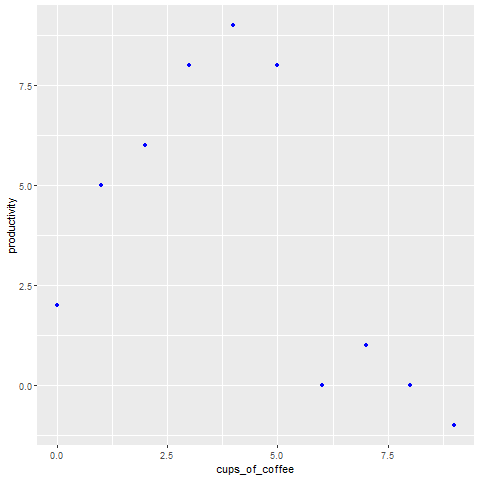

In [35]:
%%R -i df1 

library(ggplot2)

ggplot(data=df1 , aes(x=cups_of_coffee , y=productivity))+
geom_point(color="blue")

Si queremos usar dos o mas objetos de Python en un bloque de codigo en R escribimos al inicio del bloque %%R -i objeto_python_1 -i objeto_python_2 etc 

In [30]:
%%R -i df1 -i df2 

cbind(df1 , df2)

  cups_of_coffee productivity X1 X2
0              0            2  0  2
1              1            5  3 25
2              2            6 23 26
3              3            8 34  8
4              4            9 54  9
5              5            8 25  8
6              6            0  6 30
7              7            1  7  1
8              8            0  8  0
9              9           -1  9 -8


Podemos hacer cualquier cosa que R nos permita, como crear un modelo de regresion lineal con R usando un data-frame creado en Python

In [38]:
%%R -i df2

lm(X2 ~ X1 , data=df2)


Call:
lm(formula = X2 ~ X1, data = df2)

Coefficients:
(Intercept)           X1  
    9.84672      0.01499  

